In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

# Problem Statement

## Predict whether a patient is likely to get stroke based on the input parameters.

In [63]:
df = pd.read_csv('stroke_dataset.csv')

In [64]:
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [65]:
df.shape

(5110, 12)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [67]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Feature Engineering

### Checking for null values

In [68]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### BMI has got some nice null values which need to be handled

## Handling Categorical Data

One of the many ways to handle categorical data are,
1. <span style="color: blue;">**Nominal data**</span> --> data are not in any order --> <span style="color: green;">**OneHotEncoder**</span> is used in this case
2. <span style="color: blue;">**Ordinal data**</span> --> data are in order --> <span style="color: green;">**LabelEncoder**</span> is used in this case

In [69]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [71]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

#### Dropping the data having gender as "other" since it will create a feature of constant variance once converted into Categorical form, hence would ultimately be dropped

In [72]:
df.drop(df[df["gender"]=="Other"].index, inplace = True)

In [73]:
df["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [74]:
# As gender  is  a Nominal Categorical data we will perform OneHotEncoding

Gender= df[["gender"]]

Gender= pd.get_dummies(Gender, drop_first= True)

Gender.head()

,gender_Male
0,1
1,0
2,1
3,0
4,0


In [75]:
# As married or not is a  Nominal Categorical data we will perform OneHotEncoding

Status= df[["ever_married"]]

Status= pd.get_dummies(Status, drop_first= True)

Status.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [76]:
df["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [77]:
# As work_type/employment status is ordinal we will do Label Encoding
df.replace({"Never_worked": 0, "children": 1, "Self-employed": 2, "Private": 3, "Govt_job": 4}, inplace = True)

In [78]:
df.replace({"never smoked": 0, "formerly smoked": 1,  "smokes": 2, "Unknown": 3}, inplace = True)

In [79]:
# As Residence type is a  Nominal Categorical data we will perform OneHotEncoding
Residence= df[['Residence_type']]

Residence= pd.get_dummies(Residence, drop_first= True)

Residence.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [80]:
### Concatenating these new data frames
df = pd.concat([df, Gender, Status, Residence], axis = 1)

In [81]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,Residence_type_Urban
0,9046,Male,67.0,0,1,Yes,3,Urban,228.69,36.6,1,1,1,1,1
1,51676,Female,61.0,0,0,Yes,2,Rural,202.21,NaN,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,3,Rural,105.92,32.5,0,1,1,1,0
3,60182,Female,49.0,0,0,Yes,3,Urban,171.23,34.4,2,1,0,1,1
4,1665,Female,79.0,1,0,Yes,2,Rural,174.12,24.0,0,1,0,1,0


#### Dropping the categorical columns as they have been already encoded

In [20]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [82]:
df.drop(['gender','ever_married','Residence_type'], axis = 1, inplace = True)

In [100]:
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status,stroke
1,51676,61.0,0,0,2,202.21,NaN,0,1,0,0,1
2,31112,80.0,0,1,3,105.92,32.5,1,1,0,0,1
3,60182,49.0,0,0,3,171.23,34.4,0,1,1,2,1
4,1665,79.0,1,0,2,174.12,24.0,0,1,0,0,1
5,56669,81.0,0,0,3,186.21,29.0,1,1,1,1,1


### Checking whether the target class is balanced or not

In [23]:
df["stroke"].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

[Text(0, 0, 'Had a Stroke'), Text(0, 0, 'Did not have a Stroke')]

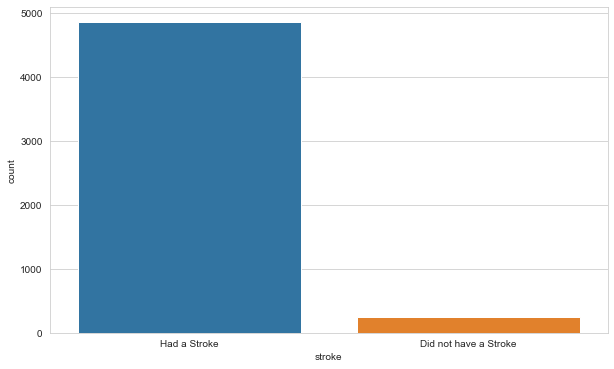

In [24]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="stroke",data=df)
plot.set_xticklabels(["Had a Stroke","Did not have a Stroke"])

#### Seems to be less balanced, going ahead with Over Sampling Technique

### Over Sampling

In [87]:
columns = df.columns.tolist()
columns

['id',
 'age',
 'hypertension',
 'heart_disease',
 'work_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'gender_Male',
 'ever_married_Yes',
 'Residence_type_Urban']

In [88]:
X = df[['id',
 'age',
 'hypertension',
 'heart_disease',
 'work_type',
 'avg_glucose_level',
 'bmi',
 'gender_Male',
 'ever_married_Yes',
 'Residence_type_Urban',
 'smoking_status']]
Y = df['stroke']

In [27]:
print(X.shape)
print(Y.shape)

(5109, 13)
(5109,)


In [83]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [89]:
os =RandomOverSampler(sampling_strategy=0.6)

In [90]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [86]:
X_train_res.shape,y_train_res.shape

((7012, 14), (7776,))

In [91]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 4860, 1: 249})
Resampled dataset shape Counter({0: 4860, 1: 2916})


In [92]:
df=X_train_res
df['stroke']=y_train_res

[Text(0, 0, 'Had a Stroke'), Text(0, 0, 'Did not have a Stroke')]

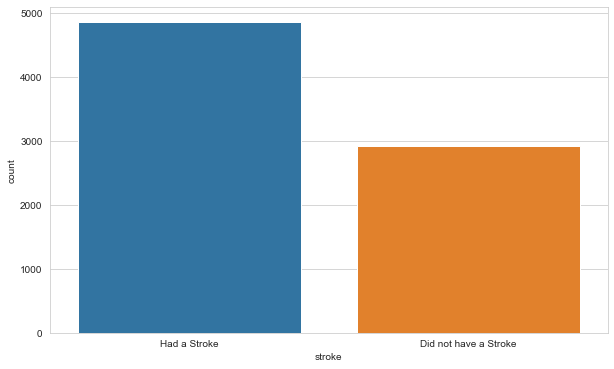

In [93]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="stroke",data=df)
plot.set_xticklabels(["Had a Stroke","Did not have a Stroke"])

In [35]:
df.head()

,id,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,9046,67.0,0,1,3,228.69,36.6,1,1,1,1,0,0,1
1,51676,61.0,0,0,2,202.21,NaN,0,1,0,0,1,0,1
2,31112,80.0,0,1,3,105.92,32.5,1,1,0,0,1,0,1
3,60182,49.0,0,0,3,171.23,34.4,0,1,1,0,0,1,1
4,1665,79.0,1,0,2,174.12,24.0,0,1,0,0,1,0,1


## Performing EDA using Panda Profiling

In [50]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Stroke Prediction')
prof_report.to_widgets()

## Feature Engineering

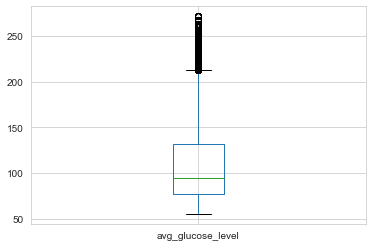

In [94]:
#average glucose level
df.boxplot(column='avg_glucose_level')

In [95]:
IQR=df.avg_glucose_level.quantile(0.75)-df.avg_glucose_level.quantile(0.25)
upper_bridge=df['avg_glucose_level'].quantile(0.75)+(IQR*1.5)
df.drop(df[df['avg_glucose_level']>upper_bridge].index, inplace = True)

## Feature Selection

#### Using Heatmap

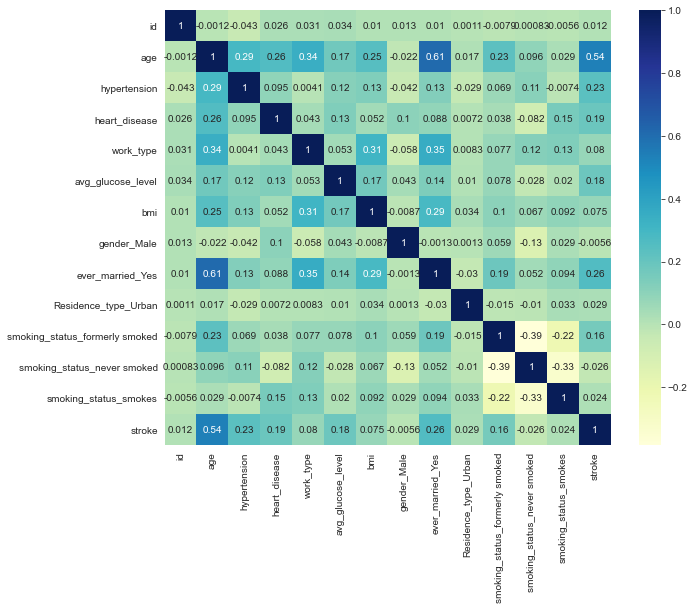

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

Index(['id', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')

#### Using Filter method ( X-Square technique) on the attributes

In [121]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['hypertension', 'gender_Male', 'heart_disease', 'work_type','ever_married_Yes','Residence_type_Urban','smoking_status_formerly smoked','smoking_status_never smoked', 'smoking_status_smokes']]  #independent columns
y = df['stroke']    #target column

In [40]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)

In [41]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [42]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [43]:
featureScores

,Specs,Score,P-Values
0,hypertension,339.315372,8.994373e-76
1,gender_Male,0.486404,4.855356e-01
2,heart_disease,213.379945,2.514693e-48
3,work_type,11.345420,7.563425e-04
4,ever_married_Yes,133.930211,5.659012e-31
5,Residence_type_Urban,2.656199,1.031469e-01
6,smoking_status_formerly smoked,134.854274,3.553132e-31
7,smoking_status_never smoked,2.392362,1.219293e-01
8,smoking_status_smokes,1.266750,2.603773e-01


#### Each one of them show association with the O/p variable at 95% level of significance

##  MODEL SELECTED- SVM Model (rbf kernel)

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()

In [104]:
x=df[['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status']]
y=df["stroke"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =101)
mean_bmi=x_train["bmi"].mean()
x_train["bmi"]=x_train["bmi"].fillna(value=mean_bmi)
x_test["bmi"]=x_test["bmi"].fillna(value=mean_bmi)

In [105]:
model=SVC(C=1,gamma=1,kernel="rbf")
model.fit(x_train,y_train)
predictions = model.predict(x_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1187    0]
 [   0  579]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1187
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1766
   macro avg       1.00      1.00      1.00      1766
weighted avg       1.00      1.00      1.00      1766



In [99]:
import pickle
pickle.dump(model, open('StrokeAcc1r1.pkl','wb'))

In [107]:
x_test.columns

Index(['age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes',
       'Residence_type_Urban', 'smoking_status'],
      dtype='object')

In [106]:
x_test.iloc[1730:1732]

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,gender_Male,ever_married_Yes,Residence_type_Urban,smoking_status
5752,77.0,0,0,4,190.32,31.4,0,1,0,0
5253,76.0,0,0,3,140.10,29.9,1,1,1,1


In [102]:
y_test.iloc[1730:1732]

5752    1
5253    1
Name: stroke, dtype: int64